In [182]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp
import sys
import matplotlib.pyplot as plt

In [4]:
species = 'hsa'

In [65]:
expr_lvl_matr = f'./{species}-tissueItems.tsv'

expr_df = pd.read_csv(expr_lvl_matr, sep='\t', header=0, index_col=0)
expr_df

,DCR-knockout1_hsa_SRR3174967,DCR-knockout2_hsa_SRR3174968,DROSHA-knockout1_hsa_SRR3174962,DROSHA-knockout2_hsa_SRR3174963,XPO-knockout1_hsa_SRR3174965,XPO-knockout2_hsa_SRR3174966,blood_hsa_SRR6880328-31,brain-fetal_hsa_SRR6853295,brain_hsa_SRR6853289,cell-lines-combined_hsa_SRR5127211,...,skeletal-muscle_hsa_SRR6853299,skin-leg_hsa,skin_hsa_SRR330904-23,small-intestine_hsa_SRR6853296,spinal-cord_hsa_SRR6853285,spleen_hsa_SRR6853286,stomach_hsa_SRR6853287,testis_hsa_SRR6853288,thymus_hsa_SRR6853302,uterus_hsa_SRR6853303
Gene name,,,,,,,,,,,,,,,,,,,,,
Hsa-Let-7-P1d_pri,534.97,559.63,1284.49,906.27,702.03,1029.74,30376.58,15062.74,132742.19,33686.15,...,21528.03,63879.93,129556.86,44043.23,56298.47,33306.59,94562.54,62880.94,62497.72,59270.77
Hsa-Let-7-P1b_pri,25.32,38.21,160.56,38.73,44.74,69.14,12.24,21377.01,8347.29,2264.64,...,2144.08,1890.85,1470.16,8426.77,1657.14,4098.27,7006.35,2467.99,3764.92,9824.55
Hsa-Let-7-P1c_pri,3.17,0.00,0.00,7.75,0.00,0.00,38.86,29978.07,19552.82,2544.90,...,7815.91,12316.78,19119.36,4358.46,7234.42,419.22,20520.26,13047.86,17901.60,50604.97
Hsa-Let-7-P2a1_pri,680.59,775.39,1284.49,898.53,702.03,1031.95,30378.22,15076.77,132773.55,33677.45,...,21565.43,63892.73,129612.35,44052.59,56330.93,33292.13,94562.54,62898.41,62522.01,59290.31
Hsa-Let-7-P2a2_pri,658.43,642.79,1284.49,921.77,703.17,1035.63,30384.16,15153.28,133033.74,33682.34,...,21615.29,63989.73,129784.49,44111.87,56424.70,33357.19,94637.94,62924.36,62558.45,59389.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hsa-Mir-7854_pri,3.17,0.00,0.00,0.00,8.03,2.21,0.73,13.34,1.93,0.53,...,0.00,0.00,0.12,0.00,0.00,0.00,5.80,0.00,0.00,0.00
Hsa-Mir-9851_pri,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Hsa-Mir-12462-v1_pri,0.00,0.00,116.77,185.90,0.00,0.74,0.07,0.00,0.00,0.82,...,0.00,0.00,1.47,0.00,0.00,0.00,0.00,0.00,0.00,1.78


In [88]:
def clean_and_merge_duplicates(expr_df):
    # Initial parsing
    expr_df.index = expr_df.index.str.replace('_pri', '', regex=False)
    expr_df.index = expr_df.index.str.replace('-v\d+', '', regex=True)

    # Group by the cleaned index
    grouped = expr_df.groupby(expr_df.index)

    cleaned_rows = []
    new_index = []
    averaged = 0
    equal = 0

    for name, group in grouped:
        if group.shape[0] == 1:
            # No duplicate, keep as is
            cleaned_rows.append(group.iloc[0].values)
        else:
            vectors = group.values
            all_equal = np.allclose(vectors, vectors[0], atol=1e-8)

            if all_equal:
                print(f"Duplicates for {name} are identical. Keeping one.", file=sys.stderr)
                cleaned_rows.append(vectors[0])
                equal += 1
            else:
                print(f"Duplicates for {name} differ. Averaging them.", file=sys.stderr)
                cleaned_rows.append(np.mean(vectors, axis=0))
                averaged += 1

        new_index.append(name)

    # Build cleaned DataFrame
    cleaned_df = pd.DataFrame(cleaned_rows, index=new_index, columns=expr_df.columns)
    print(100 * "=", file=sys.stderr)
    print(f"Number of averaged duplicates: {averaged}", file=sys.stderr)
    print(f"Number of identical duplicates: {equal}", file=sys.stderr)

    return cleaned_df

cleaned_expr_df = clean_and_merge_duplicates(expr_df)
cleaned_expr_df

Duplicates for Hsa-Mir-10-P1b differ. Averaging them.
Duplicates for Hsa-Mir-10-P1c differ. Averaging them.
Duplicates for Hsa-Mir-101-P1 differ. Averaging them.
Duplicates for Hsa-Mir-101-P2 differ. Averaging them.
Duplicates for Hsa-Mir-124-P1 differ. Averaging them.
Duplicates for Hsa-Mir-124-P2 differ. Averaging them.
Duplicates for Hsa-Mir-124-P3 differ. Averaging them.
Duplicates for Hsa-Mir-12462 differ. Averaging them.
Duplicates for Hsa-Mir-126-P2 differ. Averaging them.
Duplicates for Hsa-Mir-133-P1 differ. Averaging them.
Duplicates for Hsa-Mir-133-P2 are identical. Keeping one.
Duplicates for Hsa-Mir-133-P3 differ. Averaging them.
Duplicates for Hsa-Mir-136 differ. Averaging them.
Duplicates for Hsa-Mir-137-P1 differ. Averaging them.
Duplicates for Hsa-Mir-140-P2 differ. Averaging them.
Duplicates for Hsa-Mir-142-P2 differ. Averaging them.
Duplicates for Hsa-Mir-144 are identical. Keeping one.
Duplicates for Hsa-Mir-147 are identical. Keeping one.
Duplicates for Hsa-Mir-154

,DCR-knockout1_hsa_SRR3174967,DCR-knockout2_hsa_SRR3174968,DROSHA-knockout1_hsa_SRR3174962,DROSHA-knockout2_hsa_SRR3174963,XPO-knockout1_hsa_SRR3174965,XPO-knockout2_hsa_SRR3174966,blood_hsa_SRR6880328-31,brain-fetal_hsa_SRR6853295,brain_hsa_SRR6853289,cell-lines-combined_hsa_SRR5127211,...,skeletal-muscle_hsa_SRR6853299,skin-leg_hsa,skin_hsa_SRR330904-23,small-intestine_hsa_SRR6853296,spinal-cord_hsa_SRR6853285,spleen_hsa_SRR6853286,stomach_hsa_SRR6853287,testis_hsa_SRR6853288,thymus_hsa_SRR6853302,uterus_hsa_SRR6853303
Hsa-Let-7-P1b,25.32,38.210,160.56,38.73,44.74,69.14,12.240,21377.01,8347.29,2264.64,...,2144.08,1890.850,1470.160,8426.77,1657.14,4098.27,7006.35,2467.990,3764.920,9824.55
Hsa-Let-7-P1c,3.17,0.000,0.00,7.75,0.00,0.00,38.860,29978.07,19552.82,2544.90,...,7815.91,12316.780,19119.360,4358.46,7234.42,419.22,20520.26,13047.860,17901.600,50604.97
Hsa-Let-7-P1d,534.97,559.630,1284.49,906.27,702.03,1029.74,30376.580,15062.74,132742.19,33686.15,...,21528.03,63879.930,129556.860,44043.23,56298.47,33306.59,94562.54,62880.940,62497.720,59270.77
Hsa-Let-7-P2a1,680.59,775.390,1284.49,898.53,702.03,1031.95,30378.220,15076.77,132773.55,33677.45,...,21565.43,63892.730,129612.350,44052.59,56330.93,33292.13,94562.54,62898.410,62522.010,59290.31
Hsa-Let-7-P2a2,658.43,642.790,1284.49,921.77,703.17,1035.63,30384.160,15153.28,133033.74,33682.34,...,21615.29,63989.730,129784.490,44111.87,56424.70,33357.19,94637.94,62924.360,62558.450,59389.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hsa-Mir-95,0.00,0.000,0.00,0.00,48.18,32.36,0.260,14.74,632.60,30.21,...,623.28,69.720,105.590,65.52,52.29,831.22,52.20,49.240,36.430,24.88
Hsa-Mir-96-P1,41.15,38.210,0.00,7.75,274.16,446.47,1002.920,0.00,0.83,78.59,...,0.00,221.620,114.670,12.48,13.52,0.00,0.00,25.420,0.000,0.00
Hsa-Mir-96-P2,4621.66,6169.440,3349.90,2269.56,17842.01,27449.24,12221.270,1.40,17.60,6620.16,...,0.00,453.350,2293.050,71.76,366.95,7.23,69.60,205.970,218.610,0.00
Hsa-Mir-96-P3,13502.52,13117.645,686.04,495.74,777.73,1272.47,5353.685,2.11,5.50,784.92,...,24.93,264.565,595.235,99.84,100.98,14.46,214.60,70.685,528.305,14.22


In [90]:
duplicates = cleaned_expr_df.index[cleaned_expr_df.index.duplicated()]
print(duplicates)

Index([], dtype='object')


In [ ]:
def compute_pair_distance(mirna_1, mirna_2, expr_df, metric):
	"""
	Compute the distance between two miRNAs based on their expression levels across tissues.
	"""

	vector_1 = expr_df.loc[mirna_1].values
	vector_2 = expr_df.loc[mirna_2].values

	# avoid operands value error
	if vector_1.size == 0 or vector_2.size == 0:
		print(f"One of the miRNAs '{mirna_1}' or '{mirna_2}' does not exist in the expression DataFrame.")
		return None

	if metric == 'euclidean':
		distance = np.linalg.norm(vector_1 - vector_2)
	elif metric == 'cosine':
		distance = 1- np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
	elif metric == 'pearson':
		distance = 1 - np.corrcoef(vector_1, vector_2)[0, 1]
	elif metric == 'manhattan':
		distance = np.sum(np.abs(vector_1 - vector_2))
	else:
		raise ValueError("Unsupported metric. Choose from 'euclidean', 'cosine', 'pearson', or 'manhattan'.")

	return distance

def compute_pair_distance_avg(mirna_1, mirna_2, expr_df, metric):
    """
    Compute the distance between two miRNAs based on their expression levels across tissues.
    If duplicate entries are found for a miRNA, their expression vectors are averaged.
    """
    try:
        vecs_1 = expr_df.loc[mirna_1]
        vecs_2 = expr_df.loc[mirna_2]

        # If a single row is returned, convert to DataFrame for consistency
        if isinstance(vecs_1, pd.Series):
            vecs_1 = vecs_1.to_frame().T
        if isinstance(vecs_2, pd.Series):
            vecs_2 = vecs_2.to_frame().T

        # Average across duplicates
        vector_1 = vecs_1.mean(axis=0).values
        vector_2 = vecs_2.mean(axis=0).values

    except KeyError:
        print(f"One of the miRNAs '{mirna_1}' or '{mirna_2}' does not exist in the expression DataFrame.", file=sys.stderr)
        return None

    if metric == 'euclidean':
        distance = np.linalg.norm(vector_1 - vector_2)
    elif metric == 'cosine':
        distance = 1 - np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
    elif metric in ['correlation', 'pearson']:
        distance = 1 - np.corrcoef(vector_1, vector_2)[0, 1]
    elif metric == 'manhattan':
        distance = np.sum(np.abs(vector_1 - vector_2))
    else:
        raise ValueError("Unsupported metric. Choose from 'euclidean', 'cosine', 'correlation', or 'manhattan'.")

    return distance

In [ ]:
metric = 'euclidean'  # Choose from 'euclidean', 'cosine', 'pearson', or 'manhattan'

np.random.seed(42)

mirna_pairs = []
mirna_indices = cleaned_expr_df.index.tolist()
print(f"Number of miRNAs: {len(mirna_indices)}", file=sys.stderr)

for i in range(len(mirna_indices)):
	for j in range(i + 1, len(mirna_indices)):
		mirna_pairs.append((mirna_indices[i], mirna_indices[j]))

distances = {}
for mirna_1, mirna_2 in mirna_pairs:
	distance = compute_pair_distance(mirna_1, mirna_2, cleaned_expr_df, metric)
	if distance is not None:
		distances[(mirna_1, mirna_2)] = distance
	#print(f"Distance between {mirna_1} and {mirna_2}: {distance}")

Number of miRNAs: 514


In [389]:
print(f"Number of miRNA pairs: {len(mirna_pairs)}\nExpected: {str(int((len(mirna_indices)*(len(mirna_indices)-1))/2))}", file=sys.stderr)
notnan_distances = {k: v for k, v in distances.items() if not np.isnan(v)}
print(f"Number of distances: {len(notnan_distances)}", file=sys.stderr)

Number of miRNA pairs: 131841
Expected: 131841
Number of distances: 130816


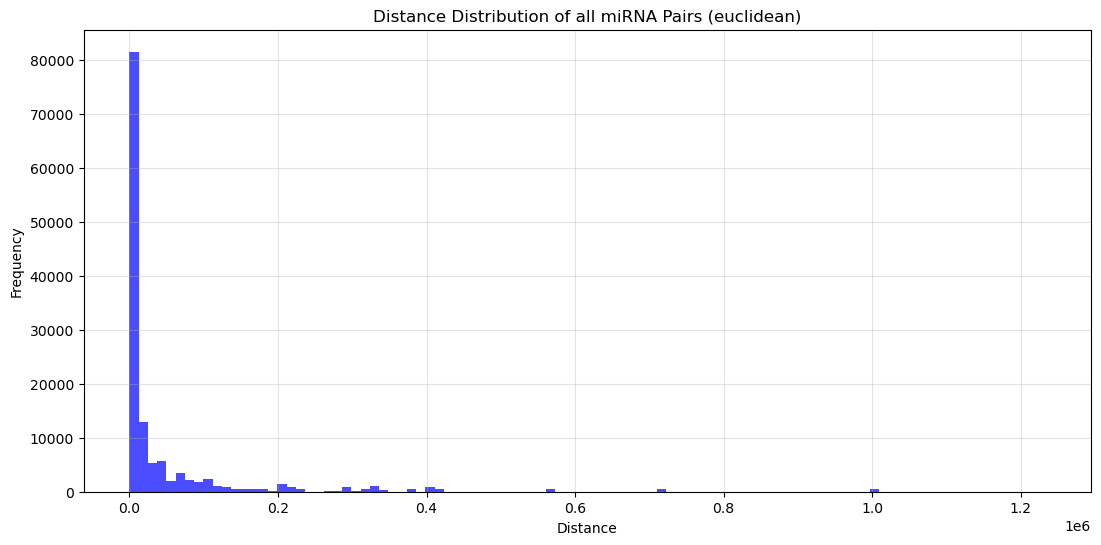

In [390]:
def plot_distance_distribution(distances, metric, bins):
	"""
	Plot the distribution of distances between miRNA pairs.
	"""
	plt.figure(figsize=(13, 6))
	plt.hist(distances, bins=bins, color='blue', alpha=0.7)
	plt.title(f'Distance Distribution of all miRNA Pairs ({metric})')
	plt.xlabel('Distance')
	plt.ylabel('Frequency')
	plt.grid(alpha=0.35)
	plt.show()

plot_distance_distribution(distances.values(), metric, np.linspace(0, max(distances.values()), 100))

___________________________________________

In [391]:
om_pairs_path = f'../Motif_analysis/PPI_Bifan/ohnomirna_pairs_predict_Hsa_existent.names.extended_info.flagged_WGD_host_genes.tsv'
pm_pairs_path = f'../3_retrieve_Hsa_paralogs/mgdb_3_hsa.premirna_paralog_pairs.extended_info.tsv'

om_pairs_df = pd.read_csv(om_pairs_path, sep='\t', header=0)
pm_pairs_df = pd.read_csv(pm_pairs_path, sep='\t', header=None)

In [392]:
om_pairs = om_pairs_df.iloc[:, [0, 7]].values
om_pairs = [tuple(sorted(pair)) for pair in om_pairs]
om_pairs
om_pairs = list(set(om_pairs))
print(f"Number of om pairs: {len(om_pairs)}", file=sys.stderr)

Number of om pairs: 114


In [393]:
pm_pairs = pm_pairs_df.iloc[:, [0, 5]].values
pm_pairs = [tuple(sorted(pair)) for pair in pm_pairs]
pm_pairs
pm_pairs = list(set(pm_pairs))
print(f"Number of pm pairs: {len(pm_pairs)}", file=sys.stderr)
# remove from pm_pairs those that are in om_pairs regardless of the order
pm_pairs = [pair for pair in pm_pairs if pair not in om_pairs]
print(f"Number of pm pairs after removing om pairs: {len(pm_pairs)}", file=sys.stderr)

Number of pm pairs: 2467
Number of pm pairs after removing om pairs: 2353


In [394]:
om_distances = []
for mirna_1, mirna_2 in om_pairs:
	distance = compute_pair_distance(mirna_1, mirna_2, cleaned_expr_df, metric)
	if distance is not None:
		om_distances.append(distance)
		print(f"Distance between {mirna_1} and {mirna_2}: {distance}")
print(f"Number of om distances: {len(om_distances)}", file=sys.stderr)

Distance between Hsa-Mir-33-P1 and Hsa-Mir-33-P3: 67.4099673638847
Distance between Hsa-Mir-15-P2b and Hsa-Mir-15-P2d: 404679.61194569874
Distance between Hsa-Mir-103-P1 and Hsa-Mir-103-P2: 20708.797747896908
Distance between Hsa-Mir-15-P1a and Hsa-Mir-15-P1c: 13934.551016591817
Distance between Hsa-Mir-17-P4a and Hsa-Mir-17-P4d: 6536.741682818742
Distance between Hsa-Mir-26-P2 and Hsa-Mir-26-P4: 186351.63393261514
Distance between Hsa-Let-7-P1b and Hsa-Let-7-P1c: 61420.607038449234
Distance between Hsa-Mir-15-P1a and Hsa-Mir-15-P1b: 5787.802959180625
Distance between Hsa-Mir-194-P2 and Hsa-Mir-194-P4: 1568.8800236793124
Distance between Hsa-Mir-181-P1b and Hsa-Mir-181-P1c: 291511.0446076858
Distance between Hsa-Mir-181-P2b and Hsa-Mir-181-P2c: 39311.068472463325
Distance between Hsa-Mir-7-P2 and Hsa-Mir-7-P4: 56.170494923936914
Distance between Hsa-Mir-10-P3b and Hsa-Mir-10-P3c: 70825.42829954224
Distance between Hsa-Mir-15-P2c and Hsa-Mir-15-P2d: 7731.078410034397
Distance between Hs

Number of om distances: 114


In [395]:
pm_distances = []
for mirna_1, mirna_2 in pm_pairs:
	distance = compute_pair_distance(mirna_1, mirna_2, cleaned_expr_df, metric)
	if distance is not None:
		pm_distances.append(distance)
		print(f"Distance between {mirna_1} and {mirna_2}: {distance}")
print(f"Number of pm distances: {len(pm_distances)}", file=sys.stderr)

Distance between Hsa-Mir-154-P28 and Hsa-Mir-154-P33: 791.8849572381079
Distance between Hsa-Mir-154-P2 and Hsa-Mir-154-P26: 4900.676279933209
Distance between Hsa-Mir-154-P32 and Hsa-Mir-154-P6b: 493.102008006457
Distance between Hsa-Mir-154-P11 and Hsa-Mir-154-P20: 1972.717492065197
Distance between Hsa-Mir-430-P14 and Hsa-Mir-430-P30: 10460.593545339576
Distance between Hsa-Mir-430-P11 and Hsa-Mir-430-P22: 1507.0839756629355
Distance between Hsa-Mir-154-P23 and Hsa-Mir-154-P26: 482.96715416268216
Distance between Hsa-Mir-376-P2 and Hsa-Mir-376-P4: 606.8651882420016
Distance between Hsa-Mir-430-P17 and Hsa-Mir-430-P4: 44.367914082138235
Distance between Hsa-Mir-430-P12a and Hsa-Mir-430-P28: 115.91920030780061
Distance between Hsa-Mir-154-P28 and Hsa-Mir-154-P3: 735.238965898163
Distance between Hsa-Mir-430-P10 and Hsa-Mir-430-P40b: 29029.571277845283
Distance between Hsa-Mir-430-P19 and Hsa-Mir-430-P4: 5665.366143613315
Distance between Hsa-Mir-154-P24 and Hsa-Mir-154-P8b: 1357.27469

Number of pm distances: 2353


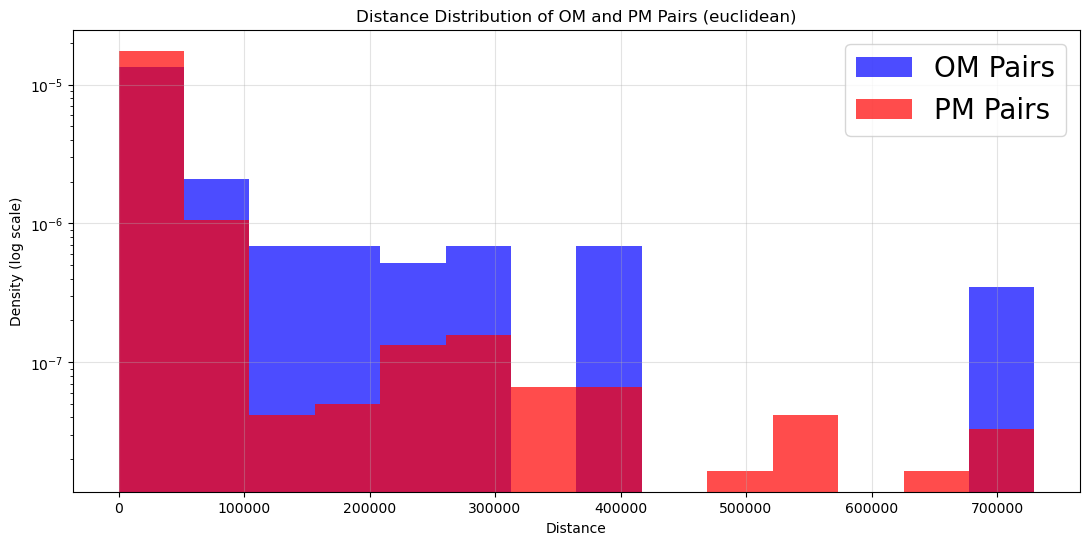

KS statistic: 0.340282142607724, p-value: 1.9285695247272514e-11


In [396]:
# plot the distribution of distances for om and pm pairs in the same plot
def plot_distance_distribution_comparison(om_distances, pm_distances, metric, nbins, binning):
	"""
	Plot the distribution of distances between om and pm pairs.
	"""
    # Convert to numpy arrays in case they are lists
	om_distances = np.array(om_distances)
	pm_distances = np.array(pm_distances)

    # Filter out zero distances to avoid log(0)
	om_distances = om_distances[om_distances > 0]
	pm_distances = pm_distances[pm_distances > 0]

	if len(om_distances) == 0 or len(pm_distances) == 0:
		print("One of the distance sets is empty or only contains zeros.", file=sys.stderr)
		return

	min_dist = min(om_distances.min(), pm_distances.min())
	max_dist = max(om_distances.max(), pm_distances.max())

	log_bins = np.logspace(np.log10(min_dist), np.log10(max_dist), nbins)
	lin_bins = np.linspace(min_dist, max_dist, nbins)

	plt.figure(figsize=(13, 6))

	if binning == 'log':
		bins = log_bins
	elif binning == 'linear':
		bins = lin_bins
	else:
		raise ValueError("Invalid binning type. Choose 'log' or 'linear'.")

	# plot distances as two separate boxplots with scatter points
	plt.hist(om_distances, bins=bins, color='blue', alpha=0.7, label='OM Pairs', density=True)
	plt.hist(pm_distances, bins=bins, color='red', alpha=0.7, label='PM Pairs', density=True)
	plt.title(f'Distance Distribution of OM and PM Pairs ({metric})')
	plt.xlabel('Distance')
	plt.ylabel('Density (log scale)')
	plt.yscale('log')
	plt.legend(fontsize=20)
	plt.grid(alpha=0.35)
	plt.show()

    # KS test
	ks_stat, p_value = ks_2samp(om_distances, pm_distances)
	print(f"KS statistic: {ks_stat}, p-value: {p_value}", file=sys.stderr)

plot_distance_distribution_comparison(om_distances, pm_distances, metric, 15, 'linear')

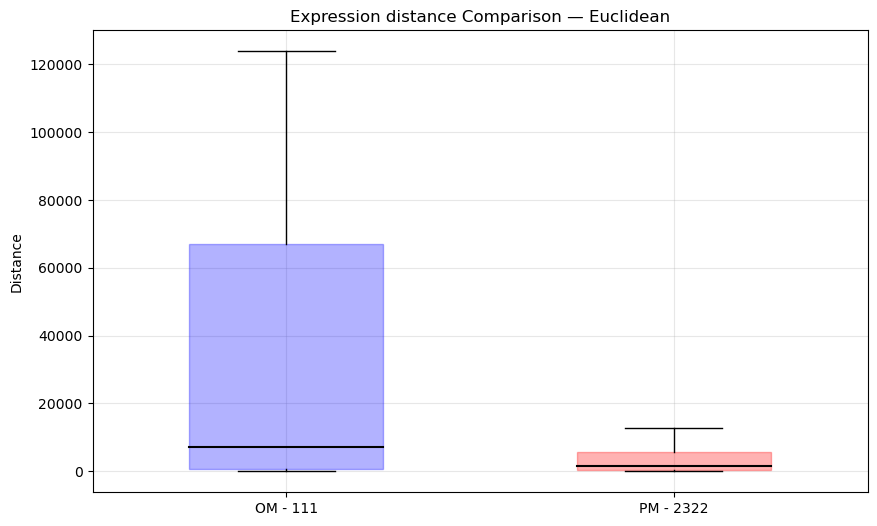

KS statistic: 0.340282142607724, p-value: 1.9285695247272514e-11


In [397]:
def plot_distance_boxplot_comparison(om_distances, pm_distances, label_1, label_2, metric, match_size=False, jitter=False):
    """
    Plot side-by-side boxplots (with scatter dots, notches, and medians)
    for OM and PM distance distributions.
    """
    # Convert to arrays and filter zeros
    om_distances = np.array(om_distances)
    pm_distances = np.array(pm_distances)
    om_distances = om_distances[om_distances > 0]
    pm_distances = pm_distances[pm_distances > 0]

    if match_size:    
        if len(pm_distances) > len(om_distances):
            pm_distances = np.random.choice(pm_distances, size=len(om_distances), replace=False)
        if len(om_distances) == 0 or len(pm_distances) == 0:
            print("One of the distance sets is empty or only contains zeros.", file=sys.stderr)
            return

    data = [om_distances, pm_distances]
    labels = [f'{label_1} - {len(om_distances)}', f'{label_2} - {len(pm_distances)}']
    colors = ['blue', 'red']

    plt.figure(figsize=(10, 6))
    
    # Boxplot with notches and median lines
    box = plt.boxplot(data, notch=False, patch_artist=True, labels=labels, showfliers=False, widths=0.5)

    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.3)
        patch.set_edgecolor(color)
        box['medians'][0].set_color('black')
        box['medians'][1].set_color('black')
        box['medians'][0].set_linewidth(1.5)
        box['medians'][1].set_linewidth(1.5)

    if jitter:
        for i, dist in enumerate(data, start=1):
            x_jitter = np.random.normal(i, 0.05, size=len(dist))
            plt.scatter(x_jitter, dist, alpha=0.1, color=colors[i-1], s=10)

    plt.ylabel('Distance')
    plt.title(f'Expression distance Comparison — {metric.capitalize()}')
    plt.grid(alpha=0.3)
    plt.show()

    # KS test
    ks_stat, p_value = ks_2samp(om_distances, pm_distances)
    print(f"KS statistic: {ks_stat}, p-value: {p_value}", file=sys.stderr)
    
plot_distance_boxplot_comparison(om_distances, pm_distances, 'OM', 'PM', metric, match_size=False, jitter=False)

In [398]:
notnan_distances = list(notnan_distances.values())

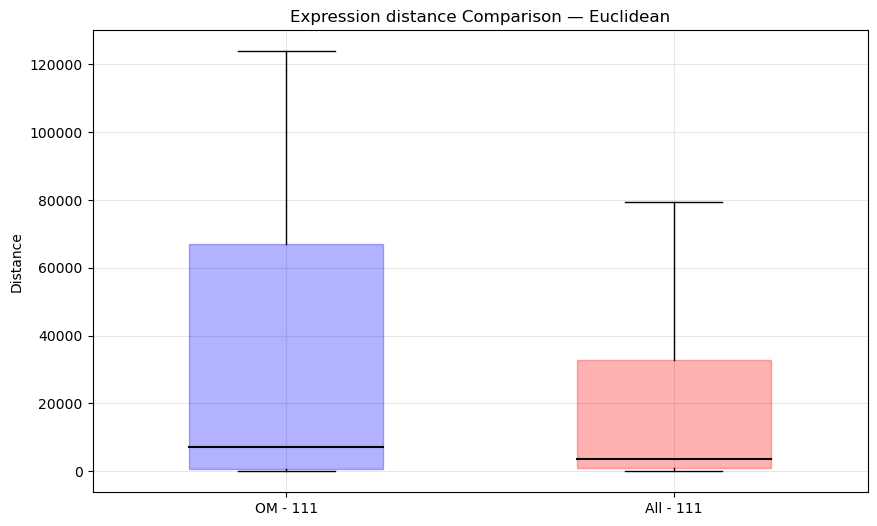

KS statistic: 0.15315315315315314, p-value: 0.14819019004969688


In [404]:
plot_distance_boxplot_comparison(om_distances, notnan_distances, 'OM', 'All', metric, match_size=1, jitter=0)

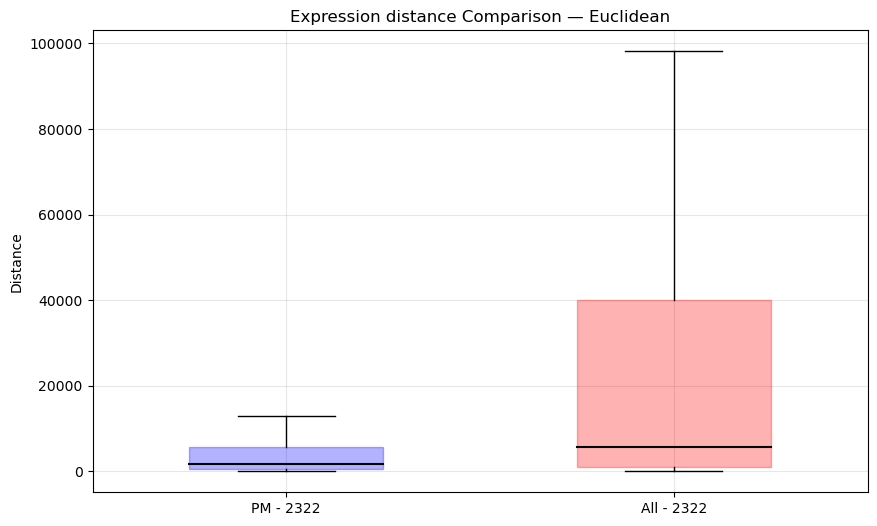

KS statistic: 0.2747631352282515, p-value: 1.5800163384420563e-77


In [403]:
plot_distance_boxplot_comparison(pm_distances, notnan_distances, 'PM', 'All', metric, match_size=1, jitter=0)